# Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import os
import warnings
warnings.filterwarnings("ignore")
import kagglehub
import zipfile
import random
import ultralytics
from ultralytics import YOLO

In [13]:
with zipfile.ZipFile("/content/archive.zip", "r") as file:
    file.extractall()


In [14]:
base_dir="/content/Traffic Dataset"
splits=["train","test","val"]
extensions=(".jpg",".jpeg",".png")

for split in splits:
  source_dir=os.path.join(base_dir,split)
  output_dir=os.path.join(base_dir,f"{split}_images_only")

  os.makedirs(output_dir,exist_ok=True)

  count=0

  for root,dirs,files in os.walk(source_dir):
    for file in files:
      if file.endswith(extensions):
        count+=1
        src_path=os.path.join(root,file)
        dst_path=os.path.join(output_dir,file)
        shutil.copyfile(src_path,dst_path)

    print(f" Extracted {count} images to: {output_dir}")

In [15]:

dataset_yaml = f"""
path: "/content/Traffic Dataset"
train: "/content/Traffic Dataset/images/train"
val:   "/content/Traffic Dataset/images/val"

nc: 7
names: ['Car', 'Number Plate', 'Blur Number Plate', 'Two Wheeler', 'Auto', 'Bus', 'Truck']
"""

yaml_path = '/content/dataset_pp.yaml'
with open(yaml_path, 'w') as f:
    f.write(dataset_yaml)

print("YAML saved at:", yaml_path)


YAML saved at: /content/dataset_pp.yaml


In [16]:
model=YOLO('yolo11n.pt')

In [17]:
model.train(data="/content/dataset_pp.yaml",epochs=50,imgsz=640,batch=16)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_pp.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d4ae0c39ca0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [30]:
model.save("Vehicals_Detection_Model.pt")

In [37]:
def predict_25_test_images(test_path,model_path):
    model = YOLO(model_path)

    images = [os.path.join(test_path, f) for f in os.listdir(test_path)
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img in random.sample(images, 5):
        results=model.predict(img, save=True)

        annotated_image=results[0].plot()

        plt.figure(figsize=(10,10))
        plt.imshow(annotated_image)
        plt.axis("off")
        plt.show()


image 1/1 /content/Traffic Dataset/images/test/00 (177).jpg: 384x640 6 Cars, 2 Blur Number Plates, 9.8ms
Speed: 2.5ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict3


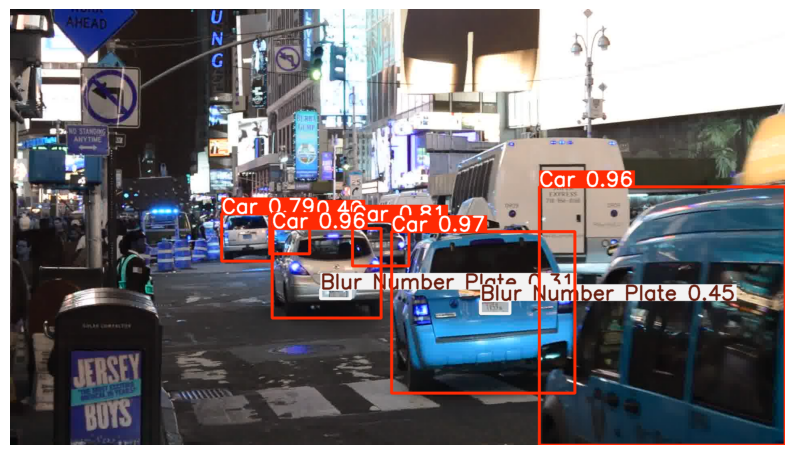


image 1/1 /content/Traffic Dataset/images/test/00 (270).jpg: 384x640 4 Cars, 1 Bus, 11.4ms
Speed: 3.5ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict3


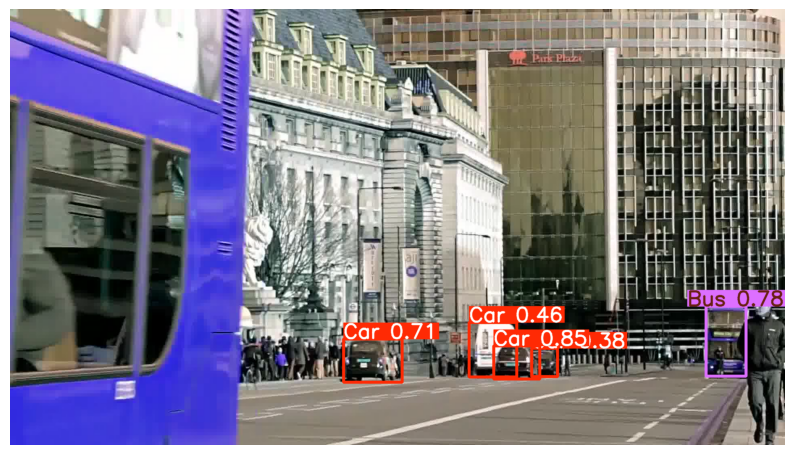


image 1/1 /content/Traffic Dataset/images/test/00 (284).jpg: 640x384 15 Cars, 1 Number Plate, 1 Bus, 14.0ms
Speed: 3.2ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to /content/runs/detect/predict3


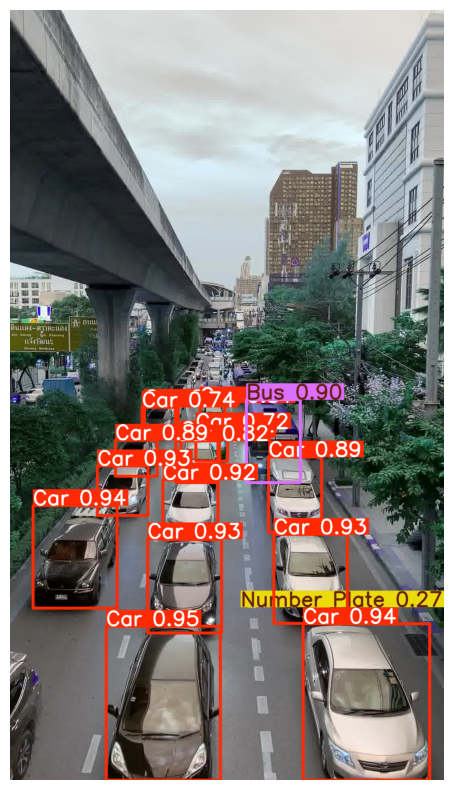


image 1/1 /content/Traffic Dataset/images/test/00 (242).jpg: 384x640 22 Cars, 3 Number Plates, 3 Trucks, 12.2ms
Speed: 3.0ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict3


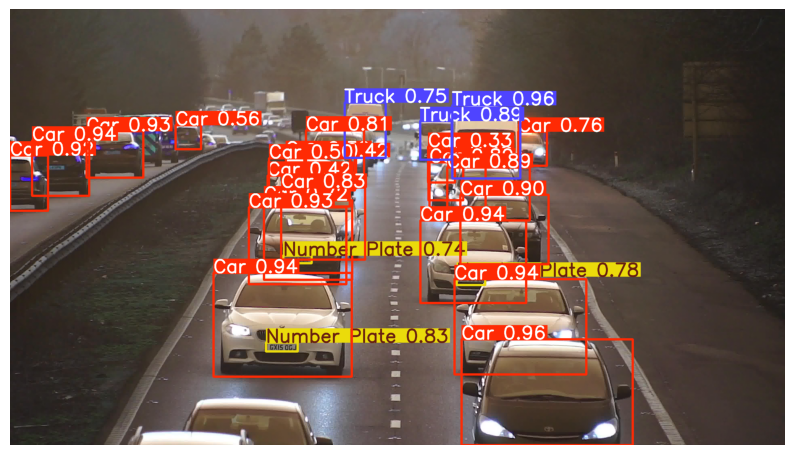


image 1/1 /content/Traffic Dataset/images/test/00 (279).jpg: 384x640 3 Cars, 1 Two Wheeler, 2 Buss, 1 Truck, 11.6ms
Speed: 2.9ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict3


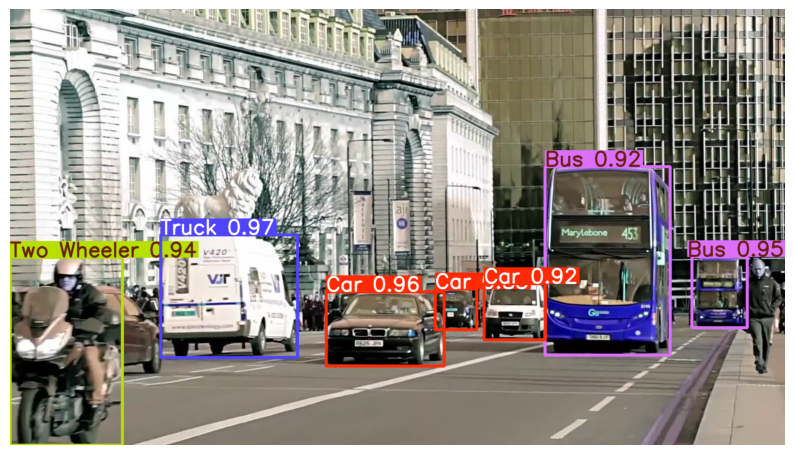

In [36]:
predict_25_test_images("/content/Traffic Dataset/images/test","/content/Vehicals_Detection_Model.pt")